# Comprehensive Data Preprocessing Notebook - Adult Income Dataset

## 1. Introduction
In this notebook, we will perform a comprehensive data preprocessing workflow on the Adult Income dataset.

We will cover various preprocessing techniques, including:

- Loading and exploring the dataset
- Handling missing values
- Encoding categorical variables
- Feature scaling
- Feature engineering
- Handling imbalanced data
- Building preprocessing pipelines

In [100]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

## 2. Loading and Exploring the Dataset

In [101]:
# Load the dataset
data = pd.read_csv('adult.csv')

In [102]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [103]:
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
                'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
                'hours_per_week', 'native_country', 'income']
data.columns = column_names

In [104]:
# Remove leading whitespace from 'income' column
data['income'] = data['income'].apply(lambda x: x.strip())

In [105]:
data.shape

(48842, 15)

In [106]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [108]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [109]:
# Show all unique values in each column
for column in data.columns:
    print(column, data[column].unique())

age [25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]
workclass ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
fnlwgt [226802  89814 336951 ... 129912 255835 257302]
education ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
education_num [ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]
marital_status ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-m

## 3. Handling Missing Values

In [110]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [111]:
# Replace '?' with NaN
data = data.replace('?', np.nan)

In [112]:
data.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
income               0
dtype: int64

In [113]:
# Replace missing values with appropriate strategies
imputer = SimpleImputer(strategy='most_frequent')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

## 4. Encoding Categorical Variables

In [114]:
# Identify categorical columns
categorical_columns = data_imputed.select_dtypes(include=['object']).columns
categorical_columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [115]:
# Ordinal encoding for 'education' column
education_order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad',
                   'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Some-college', 'Bachelors', 'Masters', 'Doctorate']
label_encoder = LabelEncoder()
label_encoder.fit(education_order)
data_imputed['education'] = label_encoder.transform(data_imputed['education'])

# Label encoding for 'workclass', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country'
label_encoder = LabelEncoder()
data_imputed[['workclass', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']] = \
    data_imputed[['workclass', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']].apply(label_encoder.fit_transform)

data_encoded = data_imputed

In [116]:
# One-hot encoding for remaining categorical columns
# onehot_encoder = OneHotEncoder(handle_unknown='ignore')
# onehot_encoded = onehot_encoder.fit_transform(data_imputed[categorical_columns]).toarray()
# onehot_columns = onehot_encoder.get_feature_names_out(categorical_columns)
# data_encoded = pd.concat([data_imputed.drop(categorical_columns, axis=1),
#                           pd.DataFrame(onehot_encoded, columns=onehot_columns)], axis=1)

## 5. Feature Scaling

In [117]:
# Identify numerical columns
numerical_columns = data_encoded.select_dtypes(include=['int64', 'float64']).columns


In [118]:
# Scale numerical features
scaler = StandardScaler()
data_scaled = pd.concat([
    pd.DataFrame(scaler.fit_transform(data_encoded[numerical_columns]), columns=numerical_columns),
    data_encoded.drop(numerical_columns, axis=1)
], axis=1)

## Feature Engineering

In [119]:
# Create new features
data_engineered = data_scaled.copy()
data_engineered['age_squared'] = data_engineered['age'] ** 2
data_engineered['capital_diff'] = data_engineered['capital_gain'] - data_engineered['capital_loss']


## 7. Handling Imbalanced Data

In [120]:
data_engineered['income'].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

Since the target variable is not highly imbalanced, we can proceed without any specific handling techniques.

## 8. Building Preprocessing Pipelines

In [121]:
# Define the preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_columns),
    ('cat', categorical_transformer, ['workclass', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country'])
])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

## 9. Model Training and Evaluation

In [122]:
# Split the data into features and target
X = data_engineered.drop('income', axis=1)
y = data_engineered['income']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8130821987920974
Classification Report:
              precision    recall  f1-score   support

       <=50K       0.86      0.90      0.88      7479
        >50K       0.62      0.53      0.57      2290

    accuracy                           0.81      9769
   macro avg       0.74      0.72      0.73      9769
weighted avg       0.81      0.81      0.81      9769



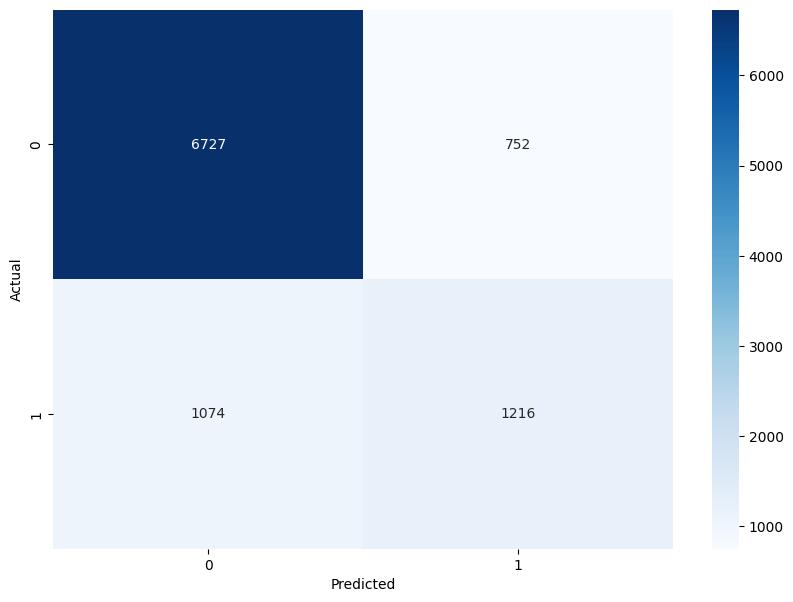

In [123]:
# Plot predictions and actual values
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()